In [0]:
import warnings 
warnings.filterwarnings('ignore')

## K-Nearest-Neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Visualization

6.Transform the dataset for building machine learning model.

7.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Finding Optimal K value

11.Repeat 7,8,9 steps.

## Problem statement

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Attributes of the dataset:** https://archive.ics.uci.edu/ml/datasets/Iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
plt.style.use('ggplot')  ## print(plt.style.available)
import seaborn as sns

## Question 1

Import the data set and print 10 random rows from the data set

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Iris.csv to Iris.csv


In [4]:
import io
df1 = pd.read_csv(io.BytesIO(uploaded['Iris.csv']))
df1.head()

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [0]:
df = df1

In [6]:
df.sample(10)

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
128,6.4,2.8,5.6,2.1,Iris-virginica
110,6.5,3.2,5.1,2.0,Iris-virginica
122,7.7,2.8,6.7,2.0,Iris-virginica
50,7.0,3.2,4.7,1.4,Iris-versicolor
81,5.5,2.4,3.7,1.0,Iris-versicolor
108,6.7,2.5,5.8,1.8,Iris-virginica
19,5.1,3.8,1.5,0.3,Iris-setosa
57,4.9,2.4,3.3,1.0,Iris-versicolor
46,5.1,3.8,1.6,0.2,Iris-setosa
82,5.8,2.7,3.9,1.2,Iris-versicolor


## Data Pre-processing

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
Sepal Length (in cm)    150 non-null float64
Sepal Width in (cm)     150 non-null float64
Petal length (in cm)    150 non-null float64
Petal width (in cm)     150 non-null float64
Class                   150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Sepal Length (in cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
Sepal Width in (cm),150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
Petal length (in cm),150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
Petal width (in cm),150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


## Question 2 - Estimating missing values

*Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median) *

In [9]:
df.isnull().any()

Sepal Length (in cm)    False
Sepal Width in (cm)     False
Petal length (in cm)    False
Petal width (in cm)     False
Class                   False
dtype: bool

## Question 3 - Dealing with categorical data

Change all the classes to numericals (0to2).

In [0]:
df['Class'] = df['Class'].replace({'Iris-versicolor':1,'Iris-setosa':2,'Iris-virginica':3})

In [0]:
df['Class'] = df['Class'].astype(np.float64)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
Sepal Length (in cm)    150 non-null float64
Sepal Width in (cm)     150 non-null float64
Petal length (in cm)    150 non-null float64
Petal width (in cm)     150 non-null float64
Class                   150 non-null float64
dtypes: float64(5)
memory usage: 5.9 KB


In [13]:
df.sample(10)

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
16,5.4,3.9,1.3,0.4,2.0
11,4.8,3.4,1.6,0.2,2.0
18,5.7,3.8,1.7,0.3,2.0
147,6.5,3.0,5.2,2.0,3.0
42,4.4,3.2,1.3,0.2,2.0
65,6.7,3.1,4.4,1.4,1.0
96,5.7,2.9,4.2,1.3,1.0
28,5.2,3.4,1.4,0.2,2.0
37,4.9,3.1,1.5,0.1,2.0
15,5.7,4.4,1.5,0.4,2.0


## Question 4

*Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.*

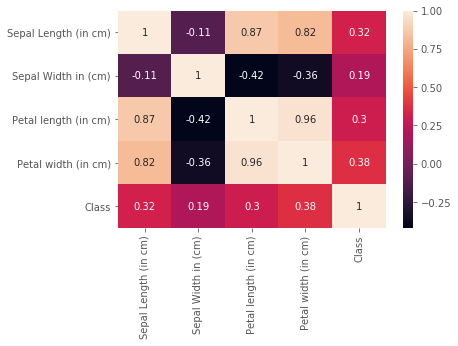

In [14]:
corr = df.corr()
sns.heatmap(corr,annot=True)

## No feature set having correlation in range -0.1 to 0.1 with target variable.



## Question 5

*Observe the independent variables variance and drop such variables having no variance or almost zero variance(variance < 0.1). They will be having almost no influence on the classification.*

In [15]:
df.nunique()

Sepal Length (in cm)    35
Sepal Width in (cm)     23
Petal length (in cm)    43
Petal width (in cm)     22
Class                    3
dtype: int64

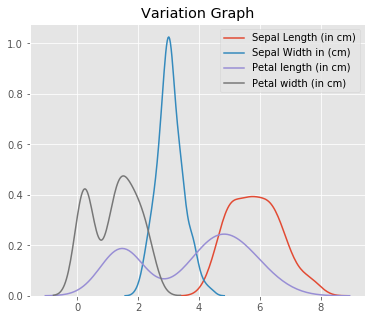

In [16]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(6, 5))

ax1.set_title('Variation Graph')
sns.kdeplot(df['Sepal Length (in cm)'], ax=ax1)
sns.kdeplot(df['Sepal Width in (cm)'], ax=ax1)
sns.kdeplot(df['Petal length (in cm)'], ax=ax1)
sns.kdeplot(df['Petal width (in cm)'], ax=ax1)

## Question 6

*Plot the scatter matrix for all the variables.*

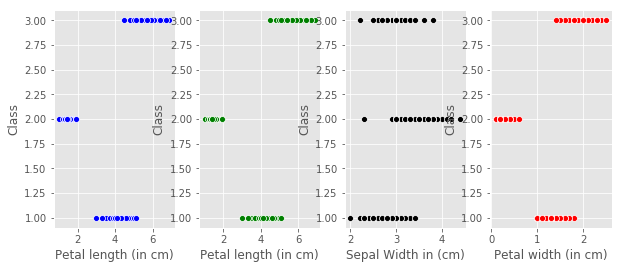

In [17]:
fig, (ax1, ax2,ax3,ax4) = plt.subplots(nrows=1, ncols=4,sharex='none', sharey='col', figsize=(10,4))

#ax1.set_title('Scatterplot-Sepal Length (in cm)')
sns.scatterplot(x = 'Petal length (in cm)' , y='Class',data=df1,color='blue',ax=ax1)
#ax1.legend(loc=2)

#ax2.set_title('Scatterplot-Petal length (in cm)')
sns.scatterplot(x = 'Petal length (in cm)' , y='Class',color='green',data=df1,ax=ax2)


#ax2.set_title('Scatterplot-Sepal Width in (cm)')
sns.scatterplot(x = 'Sepal Width in (cm)' , y='Class',color='black',data=df1,ax=ax3)


#ax2.set_title('Scatterplot-Petal width (in cm)')
sns.scatterplot(x = 'Petal width (in cm)' , y='Class',color='red',data=df1,ax=ax4)

plt.show()

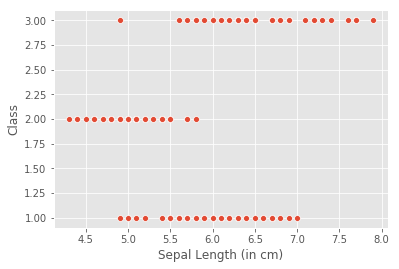

In [18]:
sns.scatterplot(x = 'Sepal Length (in cm)' , y='Class',data=df1)

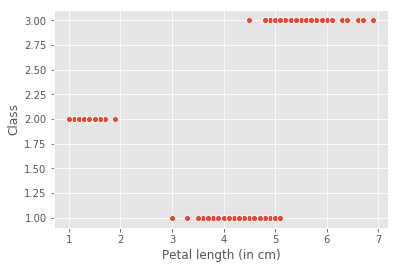

In [19]:
sns.scatterplot(x = 'Petal length (in cm)' , y='Class',data=df1)


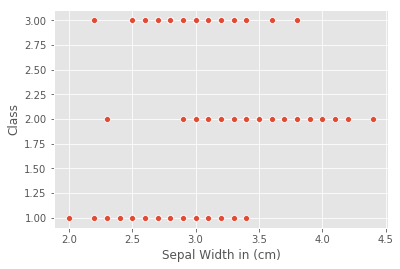

In [20]:
sns.scatterplot(x = 'Sepal Width in (cm)' , y='Class',data=df1)


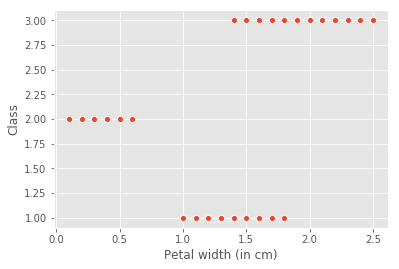

In [21]:
sns.scatterplot(x = 'Petal width (in cm)' , y='Class',data=df1)


## Split the dataset into training and test sets

## Question 7

*Split the dataset into training and test sets with 80-20 ratio.*

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler  ## http://benalexkeen.com/feature-scaling-with-scikit-learn/
from scipy.stats import zscore
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score


In [0]:
y=df['Class']


In [24]:
df.columns

Index(['Sepal Length (in cm)', 'Sepal Width in (cm)', 'Petal length (in cm)',
       'Petal width (in cm)', 'Class'],
      dtype='object')

In [0]:
df_x = df.drop('Class',axis=1)

In [89]:
df_x.sample(10)

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm)
147,6.5,3.0,5.2,2.0
33,5.5,4.2,1.4,0.2
73,6.1,2.8,4.7,1.2
96,5.7,2.9,4.2,1.3
28,5.2,3.4,1.4,0.2
81,5.5,2.4,3.7,1.0
17,5.1,3.5,1.4,0.3
125,7.2,3.2,6.0,1.8
117,7.7,3.8,6.7,2.2
64,5.6,2.9,3.6,1.3


In [0]:
z_scaled_df = df_x.apply(zscore)

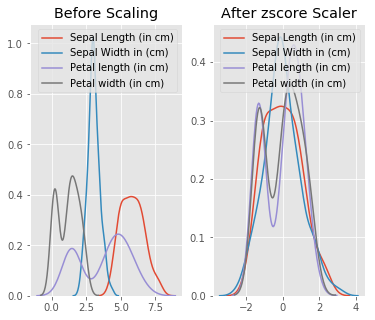

In [27]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6,5))

ax1.set_title('Before Scaling')
sns.kdeplot(df['Sepal Length (in cm)'], ax=ax1)
sns.kdeplot(df['Sepal Width in (cm)'], ax=ax1)
sns.kdeplot(df['Petal length (in cm)'], ax=ax1)
sns.kdeplot(df['Petal width (in cm)'], ax=ax1)


ax2.set_title('After zscore Scaler')
sns.kdeplot(z_scaled_df['Sepal Length (in cm)'], ax=ax2)
sns.kdeplot(z_scaled_df['Sepal Width in (cm)'], ax=ax2)
sns.kdeplot(z_scaled_df['Petal length (in cm)'], ax=ax2)
sns.kdeplot(z_scaled_df['Petal width (in cm)'], ax=ax2)
plt.show()

In [0]:
## xi–mean(x)/stdev(x)

from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
std_scaled_df = scaler.fit_transform(df_x)



In [0]:
std_scaled_df = pd.DataFrame(std_scaled_df, columns=['Sepal Length (in cm)', 'Sepal Width in (cm)', 'Petal length (in cm)','Petal width (in cm)'])

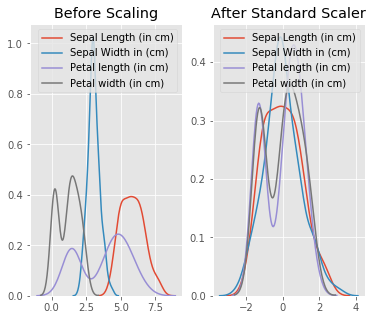

In [30]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6,5))

ax1.set_title('Before Scaling')
sns.kdeplot(df['Sepal Length (in cm)'], ax=ax1)
sns.kdeplot(df['Sepal Width in (cm)'], ax=ax1)
sns.kdeplot(df['Petal length (in cm)'], ax=ax1)
sns.kdeplot(df['Petal width (in cm)'], ax=ax1)


ax2.set_title('After Standard Scaler')
sns.kdeplot(std_scaled_df['Sepal Length (in cm)'], ax=ax2)
sns.kdeplot(std_scaled_df['Sepal Width in (cm)'], ax=ax2)
sns.kdeplot(std_scaled_df['Petal length (in cm)'], ax=ax2)
sns.kdeplot(std_scaled_df['Petal width (in cm)'], ax=ax2)
plt.show()

In [0]:
## Min-Max Scaler  xi–min(x)max(x)–min(x)

from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()
mmx_scaled_df = scaler.fit_transform(df_x)



In [0]:
mmx_scaled_df = pd.DataFrame(mmx_scaled_df, columns=['Sepal Length (in cm)', 'Sepal Width in (cm)', 'Petal length (in cm)','Petal width (in cm)'])

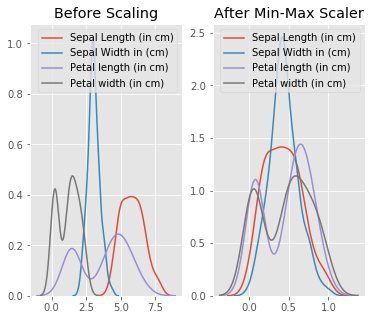

In [33]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))

ax1.set_title('Before Scaling')
sns.kdeplot(df['Sepal Length (in cm)'], ax=ax1)
sns.kdeplot(df['Sepal Width in (cm)'], ax=ax1)
sns.kdeplot(df['Petal length (in cm)'], ax=ax1)
sns.kdeplot(df['Petal width (in cm)'], ax=ax1)


ax2.set_title('After Min-Max Scaler')
sns.kdeplot(mmx_scaled_df['Sepal Length (in cm)'], ax=ax2)
sns.kdeplot(mmx_scaled_df['Sepal Width in (cm)'], ax=ax2)
sns.kdeplot(mmx_scaled_df['Petal length (in cm)'], ax=ax2)
sns.kdeplot(mmx_scaled_df['Petal width (in cm)'], ax=ax2)
plt.show()

In [0]:
## Robust Scaler  xi–Q1(x)Q3(x)–Q1(x)


from sklearn import preprocessing

scaler = preprocessing.RobustScaler()
robust_scaled_df = scaler.fit_transform(df_x)



In [0]:
robust_scaled_df = pd.DataFrame(robust_scaled_df, columns=['Sepal Length (in cm)', 'Sepal Width in (cm)', 'Petal length (in cm)','Petal width (in cm)'])

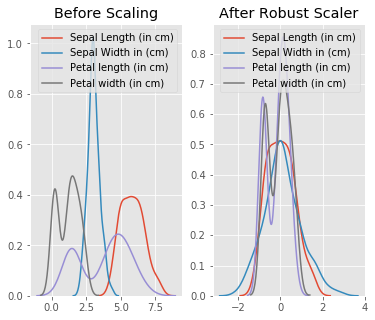

In [36]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))

ax1.set_title('Before Scaling')
sns.kdeplot(df['Sepal Length (in cm)'], ax=ax1)
sns.kdeplot(df['Sepal Width in (cm)'], ax=ax1)
sns.kdeplot(df['Petal length (in cm)'], ax=ax1)
sns.kdeplot(df['Petal width (in cm)'], ax=ax1)


ax2.set_title('After Robust Scaler')
sns.kdeplot(robust_scaled_df['Sepal Length (in cm)'], ax=ax2)
sns.kdeplot(robust_scaled_df['Sepal Width in (cm)'], ax=ax2)
sns.kdeplot(robust_scaled_df['Petal length (in cm)'], ax=ax2)
sns.kdeplot(robust_scaled_df['Petal width (in cm)'], ax=ax2)
plt.show()

In [0]:
## Normalizer  xix2i+y2i+z2i−−−−−−−−−−√

from sklearn import preprocessing

scaler = preprocessing.Normalizer()
norm_scaled_df = scaler.fit_transform(df_x)



In [0]:
norm_scaled_df = pd.DataFrame(norm_scaled_df, columns=['Sepal Length (in cm)', 'Sepal Width in (cm)', 'Petal length (in cm)','Petal width (in cm)'])

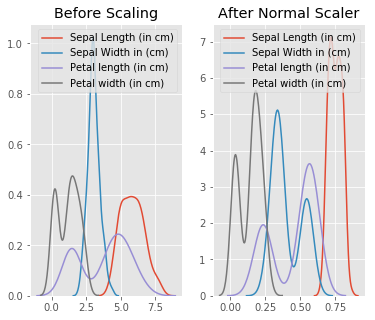

In [39]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))

ax1.set_title('Before Scaling')
sns.kdeplot(df['Sepal Length (in cm)'], ax=ax1)
sns.kdeplot(df['Sepal Width in (cm)'], ax=ax1)
sns.kdeplot(df['Petal length (in cm)'], ax=ax1)
sns.kdeplot(df['Petal width (in cm)'], ax=ax1)


ax2.set_title('After Normal Scaler')
sns.kdeplot(norm_scaled_df['Sepal Length (in cm)'], ax=ax2)
sns.kdeplot(norm_scaled_df['Sepal Width in (cm)'], ax=ax2)
sns.kdeplot(norm_scaled_df['Petal length (in cm)'], ax=ax2)
sns.kdeplot(norm_scaled_df['Petal width (in cm)'], ax=ax2)
plt.show()

In [0]:
X1 = np.array(std_scaled_df)
X2 = np.array(mmx_scaled_df)
X3 = np.array(robust_scaled_df)
X4 = np.array(norm_scaled_df)
X5 = np.array(z_scaled_df)

In [0]:
X1_train,X1_test,y1_train,y1_test = train_test_split(X1,y,test_size=0.2,random_state=3)
X2_train,X2_test,y2_train,y2_test = train_test_split(X2,y,test_size=0.2,random_state=3)
X3_train,X3_test,y3_train,y3_test = train_test_split(X3,y,test_size=0.2,random_state=3)
X4_train,X4_test,y4_train,y4_test = train_test_split(X4,y,test_size=0.2,random_state=3)
X5_train,X5_test,y5_train,y5_test = train_test_split(X5,y,test_size=0.2,random_state=3)

## Question 8 - Model

*Build the model and train and test on training and test sets respectively using **scikit-learn**. Print the Accuracy of the model with different values of **k=3,5,9**.*

**Hint:** For accuracy you can check **accuracy_score()** in scikit-learn

In [0]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics 

In [43]:
score =[]
n=0
k=[3,5,9]
i=0
for i in range(len(k)):
  n=k[i-1]
  KNN = KNeighborsClassifier(n_neighbors=n,weights='distance',metric='euclidean')
  KNN.fit(X3_train,y3_train)
  score = KNN.score(X3_test, y3_test)
  predicted_labels_X = KNN.predict(X3_test)
  acc_sc = accuracy_score(y3_test, predicted_labels_X)
  #score.append(a)
  result = 'for the value of k={0}, accuracy score is {1} '.format(n,acc_sc)
  i=i+1
  print(result)





for the value of k=9, accuracy score is 0.9666666666666667 
for the value of k=3, accuracy score is 0.9666666666666667 
for the value of k=5, accuracy score is 0.9666666666666667 


In [0]:
KNN = KNeighborsClassifier(n_neighbors=5,weights='distance',metric='euclidean')

In [45]:
KNN.fit(X1_train,y1_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [46]:
KNN.score(X1_test, y1_test)

0.9666666666666667

In [47]:
## Get the probability
df['prob'] = pd.DataFrame(KNN.predict_proba(X3_train))[1] 
df['prob'].head()

0    1.0
1    1.0
2    0.0
3    0.0
4    1.0
Name: prob, dtype: float64

In [0]:
predicted_labels_X = KNN.predict(X3_test)

In [49]:
print(confusion_matrix(y3_test, predicted_labels_X))

[[10  0  0]
 [ 0 10  0]
 [ 9  0  1]]


In [50]:
test_rmse = metrics.mean_squared_error(predicted_labels_X, y3_test) ** 0.5
print(test_rmse)

1.0954451150103321


In [51]:
print(accuracy_score(y3_test, predicted_labels_X))

0.7


## Question 9 - Cross Validation

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Mis classification error

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

In [52]:
score =[]
list_n = []
list_mse = []
n=0

k=np.arange(1,21,2)
i=0
for i in range(len(k)):
  n=k[i-1]
  KNN = KNeighborsClassifier(n_neighbors=n,weights='uniform',metric='euclidean')
  KNN.fit(X3_train,y3_train)
  score = KNN.score(X3_test, y3_test)
  predicted_labels_X = KNN.predict(X3_test)
  acc_sc = accuracy_score(y3_test, predicted_labels_X)
  MSE = 1-acc_sc
  #score.append(a)
  result = 'for the value of k={0}, accuracy score is {1} and Misclassification error (MSE) = {2} '.format(n,acc_sc,MSE)
  list_n.append(n)
  list_mse.append(MSE)
  i=i+1
  print(result)
 





for the value of k=19, accuracy score is 0.9333333333333333 and Misclassification error (MSE) = 0.06666666666666665 
for the value of k=1, accuracy score is 0.9333333333333333 and Misclassification error (MSE) = 0.06666666666666665 
for the value of k=3, accuracy score is 0.9666666666666667 and Misclassification error (MSE) = 0.033333333333333326 
for the value of k=5, accuracy score is 0.9666666666666667 and Misclassification error (MSE) = 0.033333333333333326 
for the value of k=7, accuracy score is 0.9666666666666667 and Misclassification error (MSE) = 0.033333333333333326 
for the value of k=9, accuracy score is 0.9666666666666667 and Misclassification error (MSE) = 0.033333333333333326 
for the value of k=11, accuracy score is 0.9666666666666667 and Misclassification error (MSE) = 0.033333333333333326 
for the value of k=13, accuracy score is 0.9666666666666667 and Misclassification error (MSE) = 0.033333333333333326 
for the value of k=15, accuracy score is 0.9333333333333333 and

In [53]:
 print(list_n)

[19, 1, 3, 5, 7, 9, 11, 13, 15, 17]


In [54]:
print(list_mse)

[0.06666666666666665, 0.06666666666666665, 0.033333333333333326, 0.033333333333333326, 0.033333333333333326, 0.033333333333333326, 0.033333333333333326, 0.033333333333333326, 0.06666666666666665, 0.033333333333333326]


## Question 10

*Plot misclassification error vs k (with k value on X-axis) using matplotlib.*

In [55]:
df = pd.DataFrame({'col1':list_n,'col2':list_mse})
df

,col1,col2
0,19,0.066667
1,1,0.066667
2,3,0.033333
3,5,0.033333
4,7,0.033333
5,9,0.033333
6,11,0.033333
7,13,0.033333
8,15,0.066667
9,17,0.033333


Text(-5.825000000000003, 0.5, 'mse')

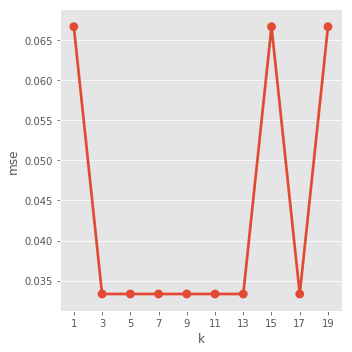

In [56]:
sns.catplot(x='col1',y='col2',data=df,kind='point')
plt.xlabel('k')
plt.ylabel('mse')


# Naive Bayes with Iris Data

In [0]:
#Load all required library
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.decomposition import PCA


### Slice  Iris data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [58]:
df1.head()

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class,prob
0,5.1,3.5,1.4,0.2,2.0,1.0
1,4.9,3.0,1.4,0.2,2.0,1.0
2,4.7,3.2,1.3,0.2,2.0,0.0
3,4.6,3.1,1.5,0.2,2.0,0.0
4,5.0,3.6,1.4,0.2,2.0,1.0


In [59]:
#Check the dataset
print(y.sample(10))
print(X1[:4])

6      2.0
67     1.0
34     2.0
135    3.0
99     1.0
54     1.0
104    3.0
148    3.0
100    3.0
138    3.0
Name: Class, dtype: float64
[[-0.90068117  1.03205722 -1.3412724  -1.31297673]
 [-1.14301691 -0.1249576  -1.3412724  -1.31297673]
 [-1.38535265  0.33784833 -1.39813811 -1.31297673]
 [-1.50652052  0.10644536 -1.2844067  -1.31297673]]


# Question 11 
Find the distribution of target variable (Class)

And, Plot the distribution of target variable using histogram

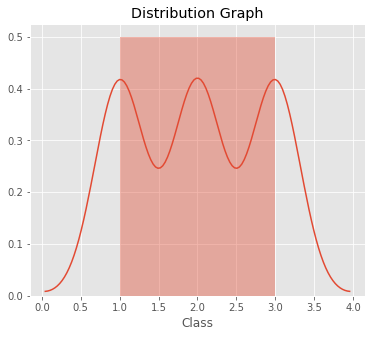

In [62]:
fig, ax1 = plt.subplots(ncols=1, figsize=(6, 5))

ax1.set_title('Distribution Graph')
sns.distplot(df1['Class'], ax=ax1)

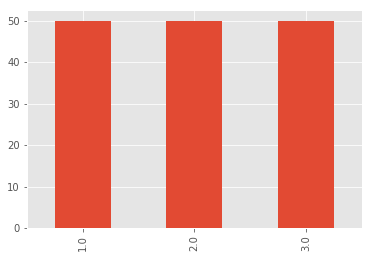

In [63]:
plt.figure()
pd.Series(df1['Class']).value_counts().sort_index().plot(kind = 'bar')

In [0]:
#Drop Id variable from data

df1.head()
df2=df1


In [0]:
df2=df2.drop('Class',axis=1)

In [66]:
df2.head()

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),prob
0,5.1,3.5,1.4,0.2,1.0
1,4.9,3.0,1.4,0.2,1.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,1.0


In [0]:
df2=df2.drop('prob',axis=1)

In [68]:
df2.head()

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Question 12 
Find Correlation among all variables and give your insights 

In [74]:
#Please note, it's Require to remove correlated features because they are voted twice in the model and 
## it can lead to over inflating importance.We will ignore it here
from sklearn import linear_model

y=df1['Class']
print(y.sample(10))

50     1.0
86     1.0
95     1.0
139    3.0
127    3.0
11     2.0
72     1.0
40     2.0
101    3.0
145    3.0
Name: Class, dtype: float64


In [0]:
y_train=np.array(y)
X_train = np.array(df2)

In [78]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
regr.coef_

array([-0.02255377,  0.63893811, -0.21428136,  1.029734  ])

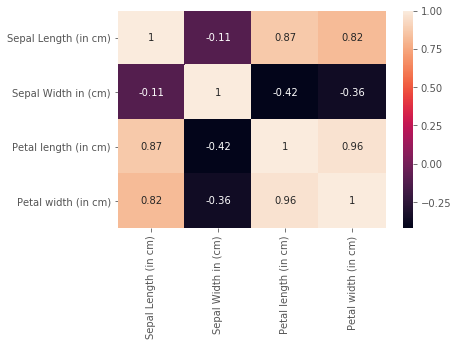

In [79]:
corr = df2.corr()
sns.heatmap(corr,annot=True)

### Split data in Training and test set in 80:20.

69     1.0
46     2.0
104    3.0
88     1.0
115    3.0
122    3.0
142    3.0
1      2.0
128    3.0
105    3.0
Name: Class, dtype: float64

### Question 13 
Do Feature Scaling 

In [0]:
# Use StandardScaler or similar methods


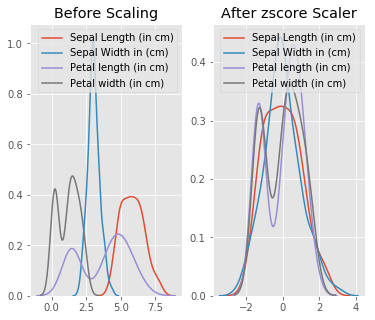

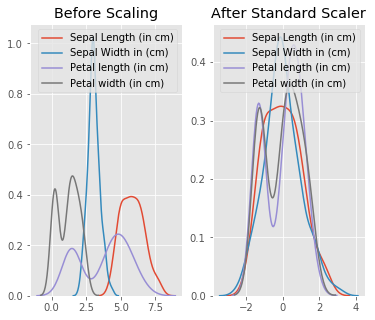

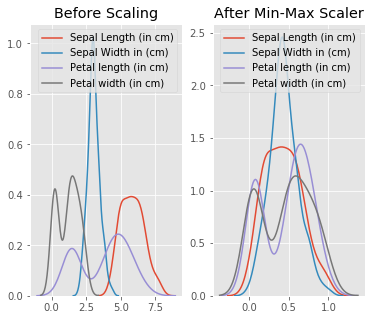

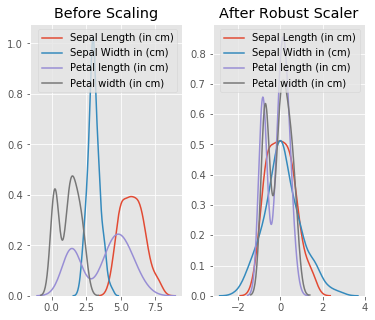

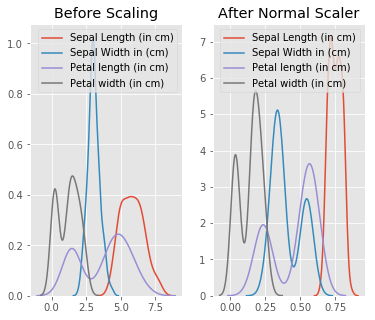

In [98]:
z_scaled_df = df2.apply(zscore)
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6,5))

ax1.set_title('Before Scaling')
sns.kdeplot(df2['Sepal Length (in cm)'], ax=ax1)
sns.kdeplot(df2['Sepal Width in (cm)'], ax=ax1)
sns.kdeplot(df2['Petal length (in cm)'], ax=ax1)
sns.kdeplot(df2['Petal width (in cm)'], ax=ax1)


ax2.set_title('After zscore Scaler')
sns.kdeplot(z_scaled_df['Sepal Length (in cm)'], ax=ax2)
sns.kdeplot(z_scaled_df['Sepal Width in (cm)'], ax=ax2)
sns.kdeplot(z_scaled_df['Petal length (in cm)'], ax=ax2)
sns.kdeplot(z_scaled_df['Petal width (in cm)'], ax=ax2)


## xi–mean(x)/stdev(x)

from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
std_scaled_df = scaler.fit_transform(df2)


std_scaled_df = pd.DataFrame(std_scaled_df, columns=['Sepal Length (in cm)', 'Sepal Width in (cm)', 'Petal length (in cm)','Petal width (in cm)'])

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6,5))

ax1.set_title('Before Scaling')
sns.kdeplot(df2['Sepal Length (in cm)'], ax=ax1)
sns.kdeplot(df2['Sepal Width in (cm)'], ax=ax1)
sns.kdeplot(df2['Petal length (in cm)'], ax=ax1)
sns.kdeplot(df2['Petal width (in cm)'], ax=ax1)


ax2.set_title('After Standard Scaler')
sns.kdeplot(std_scaled_df['Sepal Length (in cm)'], ax=ax2)
sns.kdeplot(std_scaled_df['Sepal Width in (cm)'], ax=ax2)
sns.kdeplot(std_scaled_df['Petal length (in cm)'], ax=ax2)
sns.kdeplot(std_scaled_df['Petal width (in cm)'], ax=ax2)



## Min-Max Scaler  xi–min(x)max(x)–min(x)

from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()
mmx_scaled_df = scaler.fit_transform(df2)



mmx_scaled_df = pd.DataFrame(mmx_scaled_df, columns=['Sepal Length (in cm)', 'Sepal Width in (cm)', 'Petal length (in cm)','Petal width (in cm)'])
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))

ax1.set_title('Before Scaling')
sns.kdeplot(df2['Sepal Length (in cm)'], ax=ax1)
sns.kdeplot(df2['Sepal Width in (cm)'], ax=ax1)
sns.kdeplot(df2['Petal length (in cm)'], ax=ax1)
sns.kdeplot(df2['Petal width (in cm)'], ax=ax1)


ax2.set_title('After Min-Max Scaler')
sns.kdeplot(mmx_scaled_df['Sepal Length (in cm)'], ax=ax2)
sns.kdeplot(mmx_scaled_df['Sepal Width in (cm)'], ax=ax2)
sns.kdeplot(mmx_scaled_df['Petal length (in cm)'], ax=ax2)
sns.kdeplot(mmx_scaled_df['Petal width (in cm)'], ax=ax2)



## Robust Scaler  xi–Q1(x)Q3(x)–Q1(x)


from sklearn import preprocessing

scaler = preprocessing.RobustScaler()
robust_scaled_df = scaler.fit_transform(df2)
robust_scaled_df = pd.DataFrame(robust_scaled_df, columns=['Sepal Length (in cm)', 'Sepal Width in (cm)', 'Petal length (in cm)','Petal width (in cm)'])
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))

ax1.set_title('Before Scaling')
sns.kdeplot(df2['Sepal Length (in cm)'], ax=ax1)
sns.kdeplot(df2['Sepal Width in (cm)'], ax=ax1)
sns.kdeplot(df2['Petal length (in cm)'], ax=ax1)
sns.kdeplot(df2['Petal width (in cm)'], ax=ax1)


ax2.set_title('After Robust Scaler')
sns.kdeplot(robust_scaled_df['Sepal Length (in cm)'], ax=ax2)
sns.kdeplot(robust_scaled_df['Sepal Width in (cm)'], ax=ax2)
sns.kdeplot(robust_scaled_df['Petal length (in cm)'], ax=ax2)
sns.kdeplot(robust_scaled_df['Petal width (in cm)'], ax=ax2)


## Normalizer  xix2i+y2i+z2i−−−−−−−−−−√

from sklearn import preprocessing

scaler = preprocessing.Normalizer()
norm_scaled_df = scaler.fit_transform(df2)
norm_scaled_df = pd.DataFrame(norm_scaled_df, columns=['Sepal Length (in cm)', 'Sepal Width in (cm)', 'Petal length (in cm)','Petal width (in cm)'])
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))

ax1.set_title('Before Scaling')
sns.kdeplot(df2['Sepal Length (in cm)'], ax=ax1)
sns.kdeplot(df2['Sepal Width in (cm)'], ax=ax1)
sns.kdeplot(df2['Petal length (in cm)'], ax=ax1)
sns.kdeplot(df2['Petal width (in cm)'], ax=ax1)


ax2.set_title('After Normal Scaler')
sns.kdeplot(norm_scaled_df['Sepal Length (in cm)'], ax=ax2)
sns.kdeplot(norm_scaled_df['Sepal Width in (cm)'], ax=ax2)
sns.kdeplot(norm_scaled_df['Petal length (in cm)'], ax=ax2)
sns.kdeplot(norm_scaled_df['Petal width (in cm)'], ax=ax2)
plt.show()

In [0]:
## robust_scaled_dfis showing best scaling as per the graph

In [0]:
X3 = np.array(robust_scaled_df)
X3_train,X3_test,y3_train,y3_test = train_test_split(X3,y,test_size=0.2,random_state=3)

### Question 14 
Train and Fit NaiveBayes Model

In [103]:
#Fit the model

from sklearn.naive_bayes import GaussianNB

#Create a GaussianNB Classifier
model = GaussianNB()

# Train the model using the training sets 
model.fit(X3_train, y3_train)#Create a GaussianNB Classifier



GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
#Predict
# make predictions
expected = y3_test
predicted = model.predict(X3_test)


### Question 15 
Print Accuracy and Confusion Matrix and Conclude your findings

In [120]:
# show Confusion Matrix

print(metrics.confusion_matrix(expected, predicted))

[[10  0  0]
 [ 0 10  0]
 [ 1  0  9]]


In [121]:
test_rmse = metrics.mean_squared_error(predicted_labels_X, y3_test) ** 0.5
print('test_rmse =',test_rmse)

test_rmse = 0.3651483716701107


In [122]:
# show accuracy


print(accuracy_score(y3_test, predicted_labels_X))

0.9666666666666667


In [0]:
#Show precision and Recall metrics


In [123]:

print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

         1.0       0.91      1.00      0.95        10
         2.0       1.00      1.00      1.00        10
         3.0       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

